In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [48]:
sales_data=pd.read_csv('sales.csv')

In [49]:
sales_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [50]:
sales_data.shape

(200, 4)

In [51]:
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [52]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [53]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [54]:
sales_data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [55]:
sales_data.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [56]:
sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [57]:
sales_data['TV'].value_counts()

TV
17.2     2
199.8    2
240.1    2
237.4    2
177.0    2
        ..
149.7    1
38.2     1
94.2     1
283.6    1
232.1    1
Name: count, Length: 190, dtype: int64

In [58]:
sales_data['TV'].value_counts().keys()

Index([ 17.2, 199.8, 240.1, 237.4, 177.0, 109.8, 184.9, 197.6,  76.4, 222.4,
       ...
       286.0,  18.7,  39.5,  75.5, 166.8, 149.7,  38.2,  94.2, 283.6, 232.1],
      dtype='float64', name='TV', length=190)

In [59]:
sales_data['Radio'].value_counts()

Radio
4.1     3
5.7     3
48.9    2
2.6     2
27.7    2
       ..
28.7    1
41.1    1
35.6    1
3.7     1
8.6     1
Name: count, Length: 167, dtype: int64

In [60]:
sales_data['Radio'].value_counts().keys()

Index([ 4.1,  5.7, 48.9,  2.6, 27.7,  2.1, 10.8, 49.4, 26.7,  3.5,
       ...
        5.4,  7.8, 21.3, 45.1, 12.1, 28.7, 41.1, 35.6,  3.7,  8.6],
      dtype='float64', name='Radio', length=167)

In [61]:
sales_data['Newspaper'].value_counts()

Newspaper
25.6    3
8.7     3
9.3     3
45.1    2
30.0    2
       ..
3.7     1
5.8     1
13.8    1
8.1     1
66.2    1
Name: count, Length: 172, dtype: int64

In [62]:
sales_data['Newspaper'].value_counts().keys()

Index([25.6,  8.7,  9.3, 45.1, 30.0,  7.4,  8.5, 31.6, 38.7, 23.5,
       ...
       19.6,  8.3, 26.6, 18.2, 23.4,  3.7,  5.8, 13.8,  8.1, 66.2],
      dtype='float64', name='Newspaper', length=172)

In [63]:
sales_data['Sales'].value_counts()

Sales
11.9    5
16.7    5
20.7    4
13.2    3
9.7     3
       ..
26.2    1
6.7     1
5.9     1
14.8    1
25.5    1
Name: count, Length: 121, dtype: int64

In [64]:
sales_data['Sales'].value_counts().keys()

Index([11.9, 16.7, 20.7, 13.2,  9.7, 20.9, 25.4, 11.3, 10.1, 19.8,
       ...
       20.0, 15.3,  8.4, 27.0, 16.8, 26.2,  6.7,  5.9, 14.8, 25.5],
      dtype='float64', name='Sales', length=121)

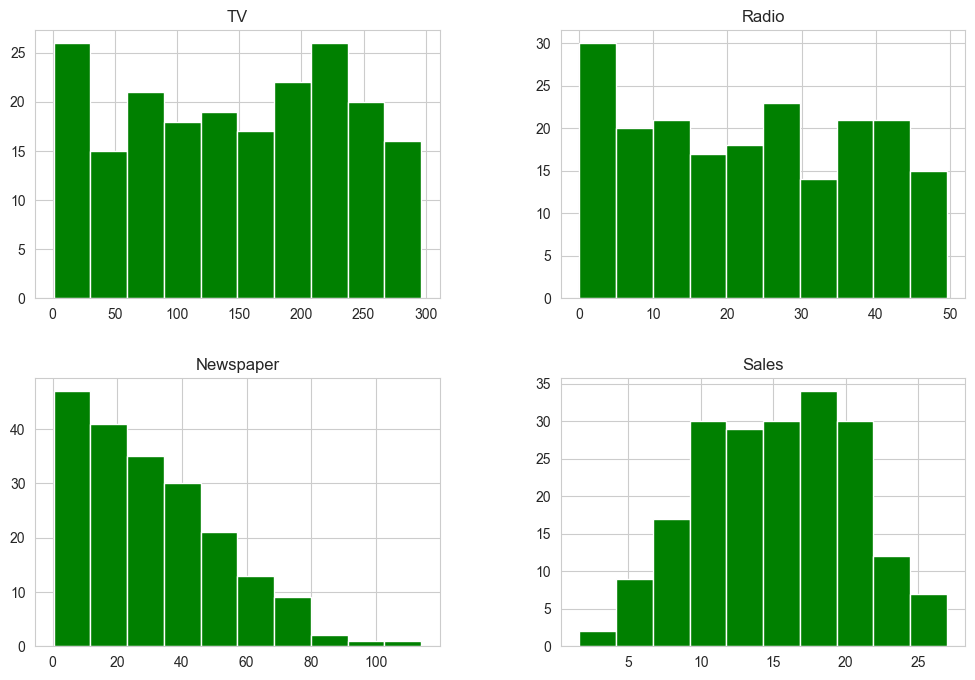

In [65]:
sales_data.hist(figsize=(12, 8),color='green')
plt.show()

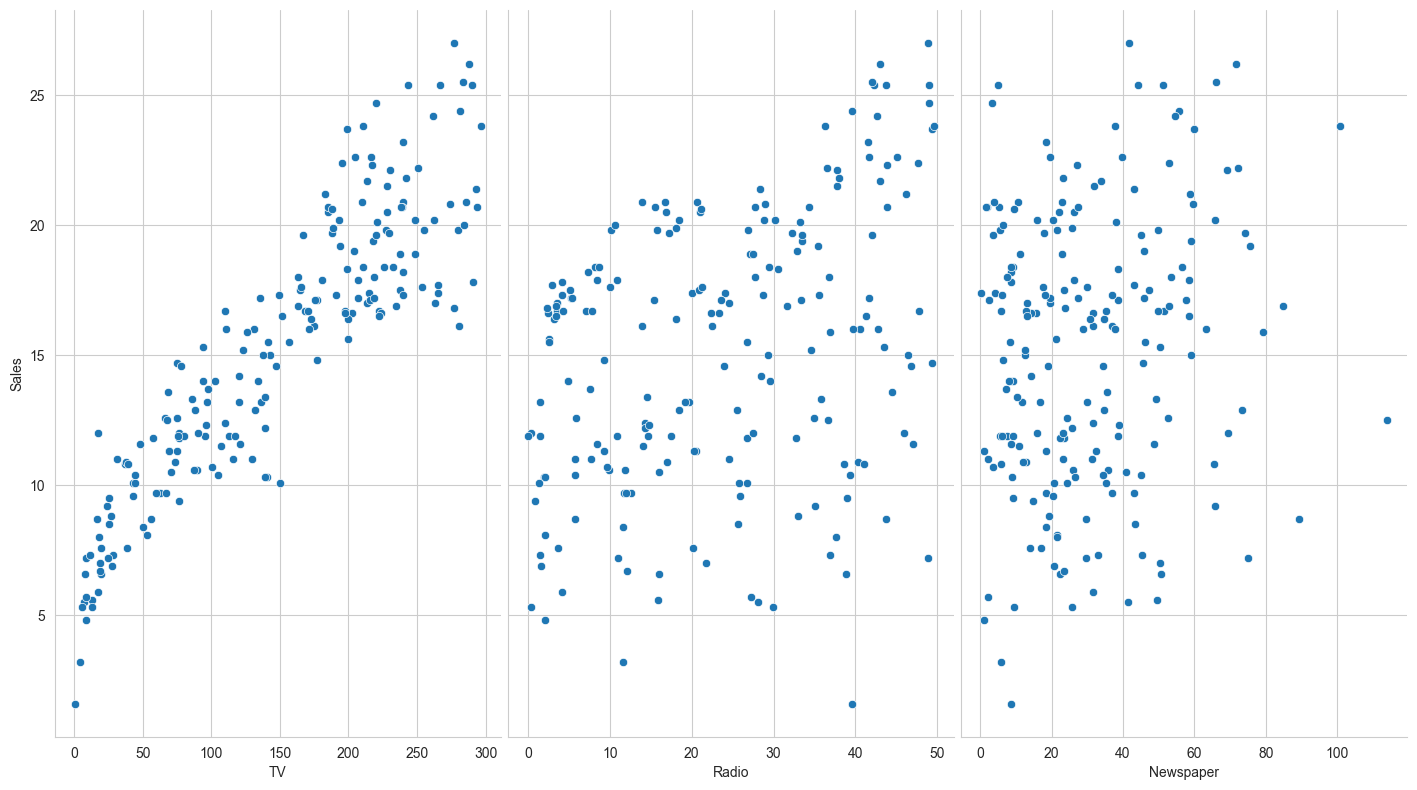

In [66]:
sns.set_style("whitegrid")
sns.pairplot(sales_data, x_vars= ['TV', 'Radio', 'Newspaper'], y_vars= 'Sales', height = 8, aspect=0.6)
plt.show()

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dtc = DecisionTreeClassifier()

In [78]:
linear_model = LinearRegression()
linear_model.fit(x_data, y_data)
y_pred_LR = linear_model.predict(x_data)
mse = mean_squared_error(y_data, y_pred_LR)
print("Mean Squared Error of Linear Regression:", mse)

Mean Squared Error of Linear Regression: 6.061656499524831e-30
